<a href="https://colab.research.google.com/github/EfrainHernandezCortes/Investigaci-n-de-Operaciones-7MM1/blob/main/Inventario_con_descuento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Inventario con descuento

Ejercicio

LubeCar se especializa en cambios de aceite para motor de automóvil. El servicio compra aceite para motor a granel, a 3 por galón. Si LubeCar compra más de 100 galones obtiene un descuento de 2.5 por galón. En el servicio se atienden unos 150 autos diarios, y cada cambio de aceite requiere de 1.25 galones. LubeCar guarda el aceite a granel con un costo de 0.02 por galón y por día. También, el costo de colocar un pedido de aceite a granel es de 20. Hay un tiempo de 2 días para la entrega. Determine la política óptima de inventario.

El consumo diario de aceite es: D = 150 automóviles por día x 1.25 galones por automóvil = 187.5 galones por día.

Datos:

c1 = 3 pesos por galón

c2 = 2.5 pesos galón

d = 150 autos por día

h = 0.02 pesos / día*galón

K = 20 pesos

L = 2 días

q = 1000 galones

In [3]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np
import math as m

In [4]:
#Definimos los símbolos y las funciones
c1, c2, d, h, K, L, Q, Qop= sp.symbols("c1, c2, d, h, K, L, Q, Qop")
T = sp.Function("T")
Qo = sp.Function("Qo")

In [5]:
#Datos
c1=3
c2=2.5
d=187.5 #(150 automóviles por día * 1.25 galones por automóvil)
h=0.02
K=20
L=2
q=1000
Qop=612.3724

Paso 1. Se calcula Q óptima (Q*)

In [6]:
def Qop(K,d,h):
    return np.sqrt((2*K*d)/h)

In [7]:
Qop(K,d,h)

np.float64(612.3724356957945)

Paso 2. Determinar la zona de q.

In [8]:
def T(Q):
    if Q <= q:
        f = c1*d+K*d/Q+h*Q/2
    else:
        f = c2*d+K*d/Q+h*Q/2
    return f

In [9]:
T(Qop(K,d,h))

np.float64(574.7474487139159)

Se tiene la ecuación:

In [11]:
eq = sp.Eq(Q**2 + (2/h)*(c2*d-T(Qop(K,d,h)))*Q+ (2*K*d)/h, 0)

In [12]:
eq

Eq(Q**2 - 10599.7448713916*Q + 375000.0, 0)

Se resuelve la ecuación:

In [13]:
sol = sp.solve(eq, Q)

In [14]:
sol

[35.4970848447485, 10564.2477865469]

10564.2477865469 > 612.3724356957945

Entonces se toma la segunda zona.

q = Q*

Considerando que el tiempo de entrega es de 2 días, se tiene el punto de reorden

2D = 187.5 * 2 = 375 galones.

Entonces la política óptima de inventario es:

Pedir 1000 galones cuando se llegue a 375 galones.

Ejercicio 1.  Escriba una función que calcula la Q óptima. Es decir, que resuelva de manera interna la ecuación cuadrática y seleccione la solución correcta e indique en qué región está.

In [21]:
Q = sp.symbols('Q')
def Q_Optima(c1, c2, d, h, K, q):
    Qo = np.sqrt((2 * K * d) / h) #Para encontrar Q*
    T_Qo_val = c1 * d + (K * d) / Qo+ (h * Qo) / 2
    eq_numerica = Q**2 + (2 / h) * (c2 * d - T_Qo_val) * Q + (2 * K * d) / h #La ecuación que teníamos
    soluciones = sp.solve(eq_numerica, Q) #Su solución

    sol_float = [float(s) for s in soluciones]
    sol_mayor = max(sol_float)
    raiz_superior = sol_mayor

    if sol_mayor > Qo:
        T_Qo_base = c1 * d + (K * d) / Qo + (h * Qo) / 2
        T_q = c2 * d + (K * d) / q + (h * q) / 2

        if T_Qo_base < T_q:
             Q_optima = Qo
             region = "Región I (Q <= q)"
             costo_minimo = T_Qo_base
        else:
             Q_optima = q # Se ajusta para obtener el descuento
             region = "Región II (Q > q)"
             costo_minimo = T_q
    else:
        Q_optima = Qo
        region = "Región II (Q > q)"
        costo_minimo = c2 * d + (K * d) / Q_optima + (h * Q_optima) / 2

    return Q_optima, region, costo_minimo, Qo, raiz_superior

In [48]:
Q_optima_final, region_final, costo_final, Qo, raiz_superior = Q_Optima(c1, c2, d, h, K, q) #Llamamos a la función
print(f"Q*: {Qo:.4f}")
print(f"Solución de la ecuación: {raiz_superior:.4f}")
print(f"Cantidad Óptima: {Q_optima_final:.0f} galones")
print(f"Región de la Solución Óptima: {region_final}")

Q*: 612.3724
Solución de la ecuación: 10564.2478
Cantidad Óptima: 1000 galones
Región de la Solución Óptima: Región II (Q > q)


Calculando t*

In [24]:
t1 = Qo/d

In [25]:
t1

np.float64(3.2659863237109037)

In [27]:
n = np.floor(L/t1)

Tiempo de entrega:

In [28]:
Le = L - n * t1

In [29]:
Le

np.float64(2.0)

Ejercicio 2. Escribir una función que reciba los datos del problema y devuelva la política óptima del inventario.

In [49]:
def Politica_Inventario_Optima(c1, c2, d, h, K, q, L_dias):
    try:
        Qo = np.sqrt((2 * K * d) / h)
    except ZeroDivisionError:
        return "Error: El costo de mantenimiento (h) no puede ser cero"

    T_Qo_base = c1 * d + (K * d) / Qo + (h * Qo) / 2
    T_q = c2 * d + (K * d) / q + (h * q) / 2

    if Qo < q:
        if T_Qo_base <= T_q:
            Q_optima = Qo
        else:
            Q_optima = q
    else:
        Q_optima = Qo

    R_final = L_dias * d
    t1 = Q_optima / d
    n = np.floor(L_dias / t1)
    Le = L_dias - n * t1

    print ('Política de inventario:')
    print(f'Pedir {Q_optima:.0f} galones cuando el nivel de inventario baje a {R_final:.0f} galones con un tiempo efectivo de entrega de {Le:.0f} días ')

    return Q_optima, R_final, Le

In [44]:
Q_optima_final, R_final, Le_final = Politica_Inventario_Optima(c1, c2, d, h, K, q, L)

Política de inventario:
Pedir 1000 galones cuando el nivel de inventario baje a 375 galones con un tiempo efectivo de entrega de 2 días 


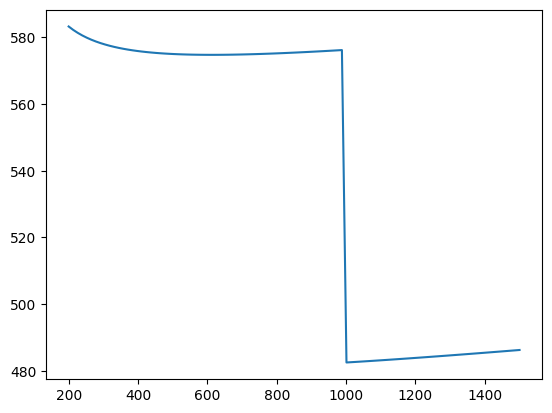

In [47]:
x=np.linspace(200,1500,100)

def T(Q_array,c1,c2,q,h,K,d):
    f_case1 = c1*d + (K*d)/Q_array + (h*Q_array)/2
    f_case2 = c2*d + (K*d)/Q_array + (h*Q_array)/2
    return np.where(Q_array <= q, f_case1, f_case2)

plt.plot(x,T(x,c1,c2,q,h,K,d))

*